In [54]:
%matplotlib notebook
import numpy as np
from sklearn.datasets import load_digits
import learning_curve
import matplotlib.pyplot as plt

np.random.seed(seed=42)

# Import data

In [55]:
#Load some real data and check some statistics
digits = load_digits()
X, y = digits.data, digits.target
labels = np.unique(y)
print "labels : ",labels

labels :  [0 1 2 3 4 5 6 7 8 9]


labels are integers, so it's a problem of classification

In [77]:
n = X.shape[0]
p = X.shape[1]
print "n = "+str(n)
print "p = "+str(p)

n = 1797
p = 64


<IPython.core.display.Javascript object>


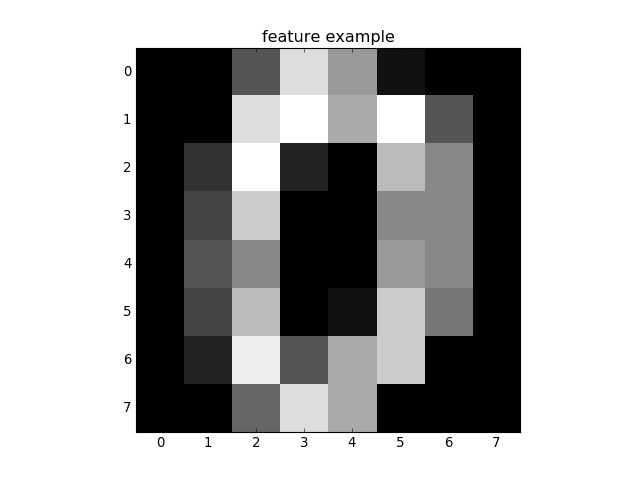

In [82]:
fig = plt.figure()
plt.imshow(np.reshape(X[0], (8, 8)), cmap=plt.cm.gray, interpolation='nearest')
plt.title("feature example")
plt.show()

label 0


<IPython.core.display.Javascript object>


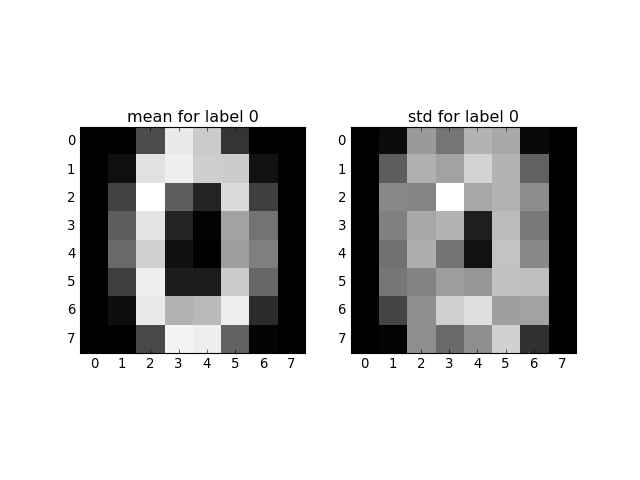

label 1


<IPython.core.display.Javascript object>


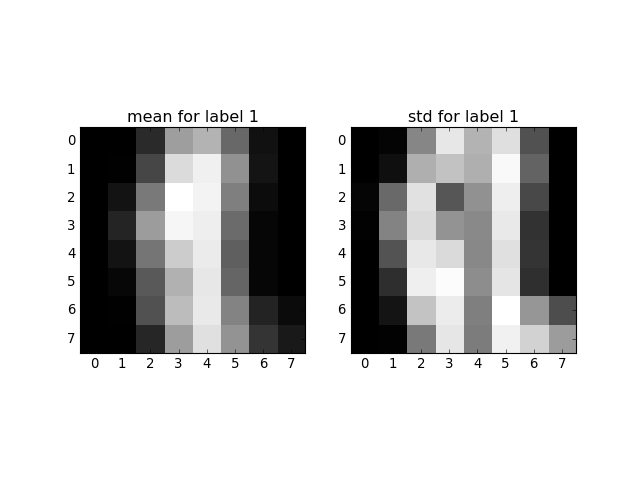

label 2


<IPython.core.display.Javascript object>


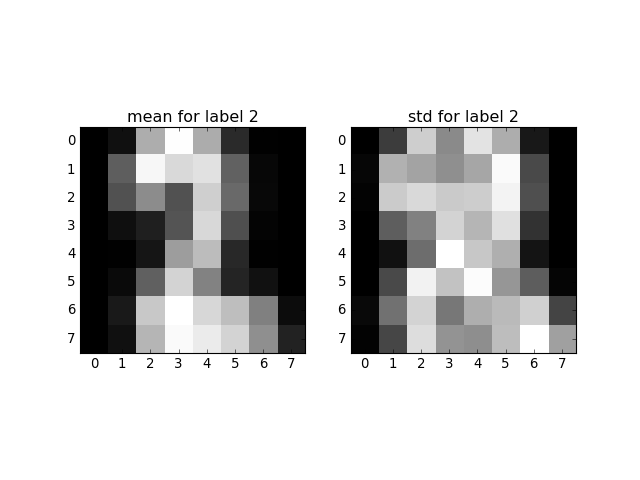

label 3


<IPython.core.display.Javascript object>


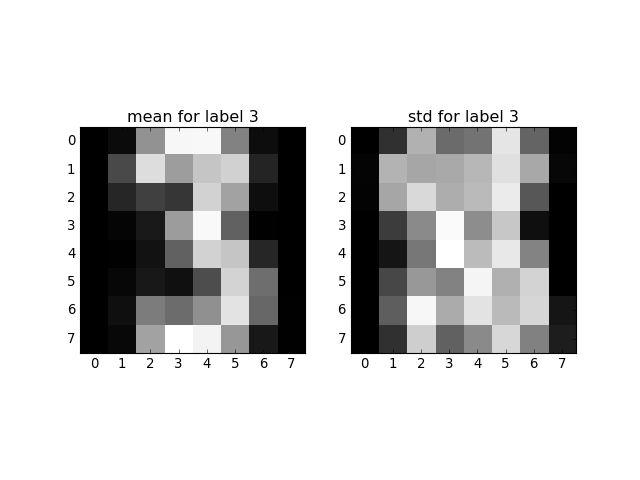

label 4


<IPython.core.display.Javascript object>


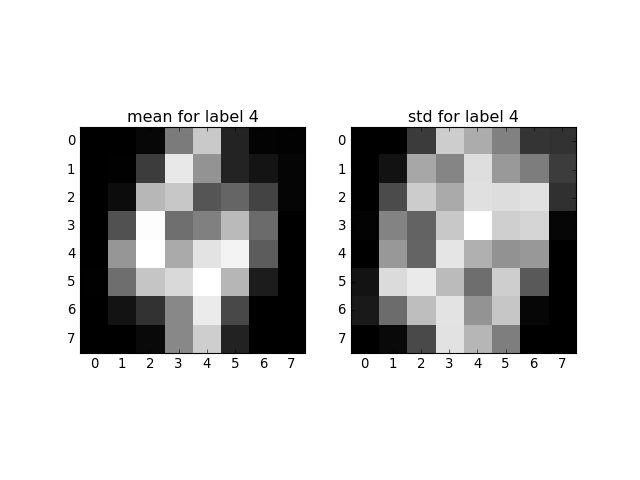

label 5


<IPython.core.display.Javascript object>


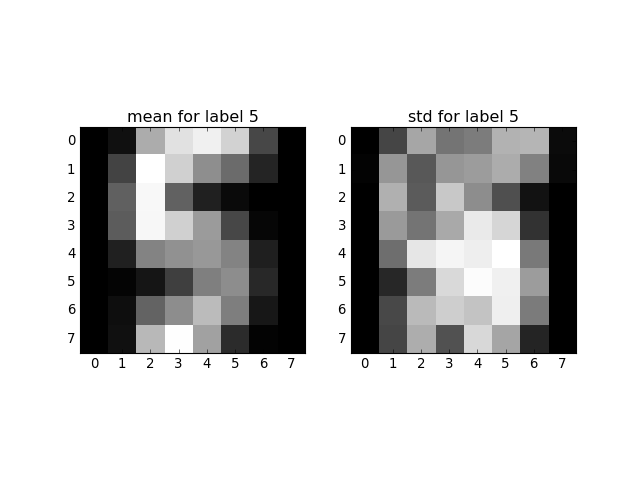

label 6


<IPython.core.display.Javascript object>


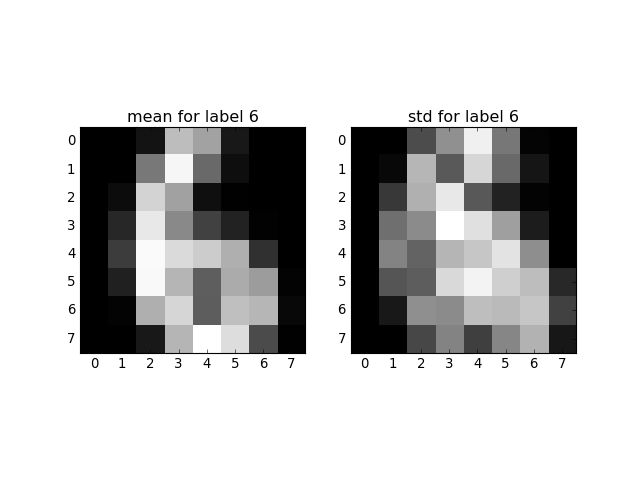

label 7


<IPython.core.display.Javascript object>


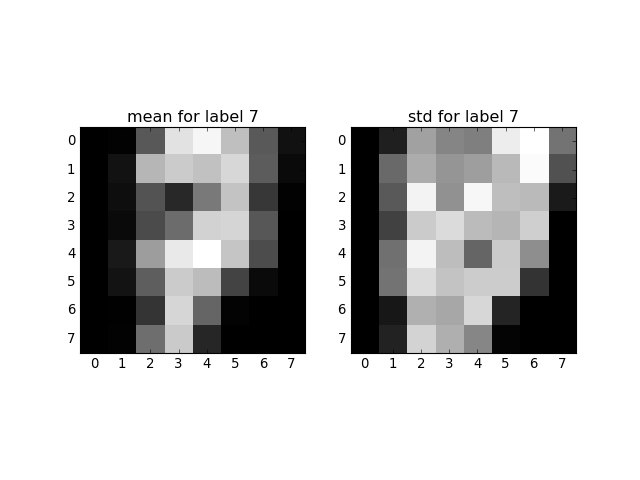

label 8


<IPython.core.display.Javascript object>


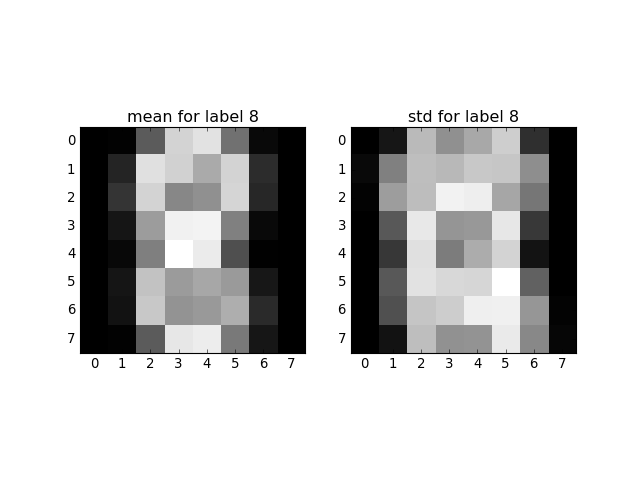

label 9


<IPython.core.display.Javascript object>


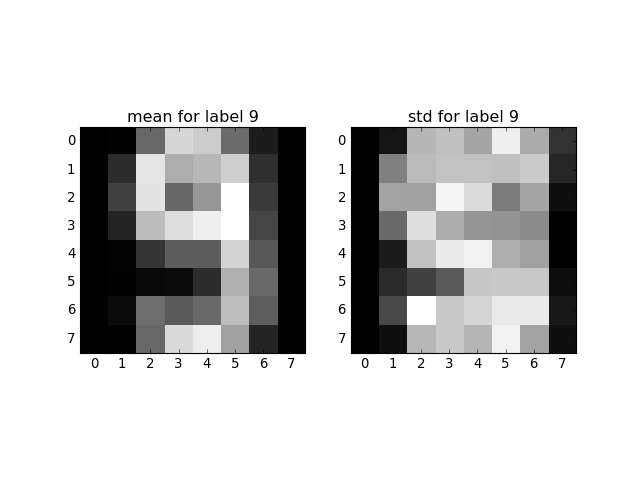

In [143]:
labels = np.unique(y)
mu = np.zeros((n,p))
std = np.zeros((labels.size,p))
for l in labels:
    print "label "+str(l)
    mu[l,:] = np.mean(X[y==l,:],axis=0)
    std[l,:] = np.std(X[y==l,:],axis=0)
    fig2 = plt.figure()
    ax = fig2.add_subplot(1,2,1)
    ax.imshow(np.reshape(mu[l,:],(8,8)), cmap=plt.cm.gray, interpolation='nearest')
    ax.set_title("mean for label "+str(l))
    ax = fig2.add_subplot(1,2,2)
    ax.imshow(np.reshape(std[l,:],(8,8)), cmap=plt.cm.gray, interpolation='nearest')
    ax.set_title("std for label "+str(l))
    plt.show()

# Cross validation

In [ ]:
from sklearn.preprocessing import StandardScaler

stdscl = StandardScaler()
Xscl = stdscl.fit_transform(X)



In [106]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
from sklearn.linear_model import LogisticRegression
clf_logreg = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
from sklearn import cross_validation

errors_gnb =  cross_validation.cross_val_score(clf_gnb,X,y,cv=5)
print "Gaussian Naive Bayes cross validation mean error : ",np.mean(errors_gnb)," with variance ",np.std(errors_gnb)
errors_logreg =  cross_validation.cross_val_score(clf_logreg,X,y,cv=5)
print "Logistique Regression cross validation mean error : ",np.mean(errors_logreg)," with variance ",np.std(errors_logreg)
errors_tree =  cross_validation.cross_val_score(clf_tree,X,y,cv=5)
print "Decision Tree cross validation mean error : ",np.mean(errors_tree)," with variance ",np.std(errors_tree)

Gaussian Naive Bayes cross validation mean error :  0.806520755555  with variance  0.0310328964783
Logistique Regression cross validation mean error :  0.921018811336  with variance  0.0302462780159
Decision Tree cross validation mean error :  0.775388663133  with variance  0.0368330012969


# Training and validation errors depending on number of samples

best regularization paramdter C for SVM :  100


<IPython.core.display.Javascript object>


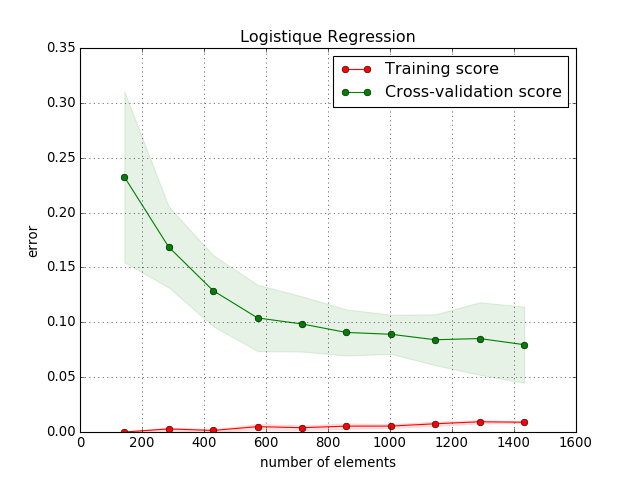

<IPython.core.display.Javascript object>


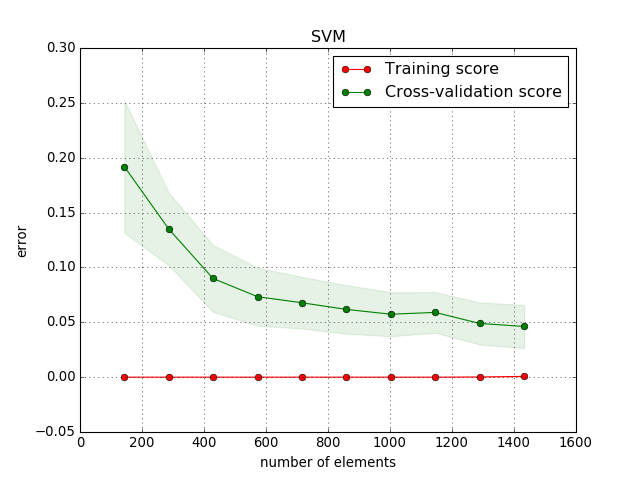

<IPython.core.display.Javascript object>


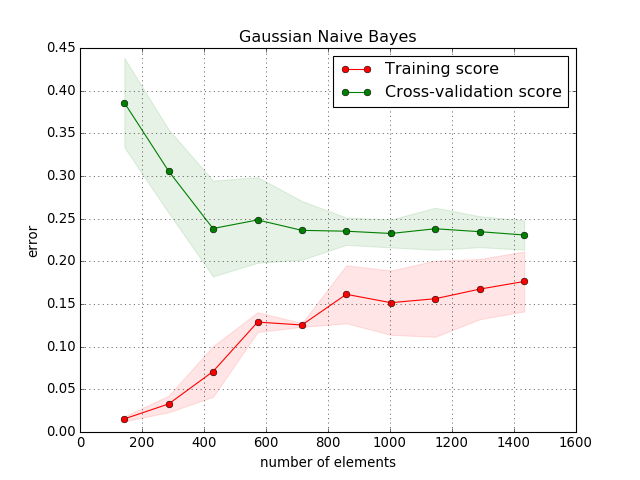

<IPython.core.display.Javascript object>


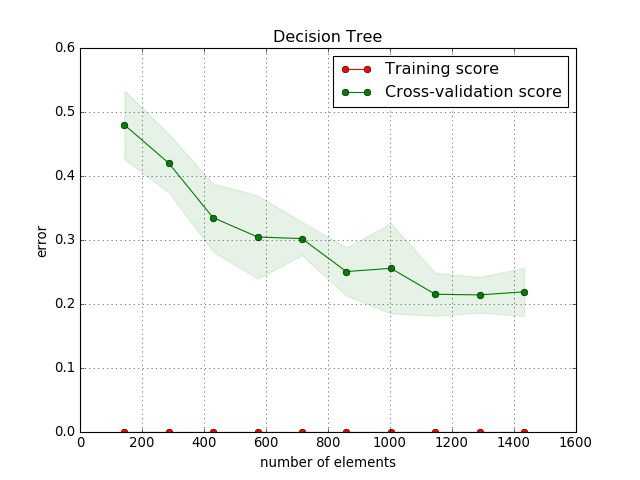

In [160]:
from sklearn.learning_curve import learning_curve
from sklearn.svm import SVC
from sklearn import grid_search


clf_gnb = GaussianNB()
clf_logreg = LogisticRegression()
clf_tree = DeciasionTreeClassifier()

param_grid = {'C': [0.01,0.1,1,10,100,1000,10000]}
clf_svc = grid_search.GridSearchCV(SVC(gamma=0.001), param_grid)
clf_svc.fit(Xscl,y)
C_best = clf_svc.best_params_['C']
clf_svc = SVC(gamma=0.001,C=C_best)
print "best regularization parameter C for SVM : ",C_best
#clf_svc = SVC(gamma=0.001)

clf_list = dict()
clf_list["Gaussian Naive Bayes"] = clf_gnb
clf_list["Logistique Regression"] = clf_logreg
clf_list["Decision Tree"] = clf_tree
clf_list["SVM"] = clf_svc

for name_clf in clf_list:
    clf = clf_list[name_clf]
    train_sizes_abs, train_scores ,test_scores = learning_curve(clf,Xscl,y,train_sizes=np.linspace(.1, 1.0, 10),cv=5)
    train_errors_mean = np.mean(1-train_scores,axis=1)
    test_errors_mean = np.mean(1-test_scores,axis=1)
    train_errors_std = np.std(1-train_scores, axis=1)
    test_errors_std = np.std(1-test_scores, axis=1)

    fig3 = plt.figure()
    plt.grid()
    plt.fill_between(train_sizes_abs, train_errors_mean - train_errors_std,
                         train_errors_mean + train_errors_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes_abs, test_errors_mean - test_errors_std,
                         test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes_abs, train_errors_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes_abs, test_errors_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    plt.xlabel('number of elements')
    plt.ylabel('error')
    plt.legend()
    plt.title(name_clf)
    plt.show()

# Validation 

Decision Tree 5
regularization parameter list :  [10, 50, 75, 100, 150, 200, 250, 300, 350, 400]
errors :  [ 0.37173066  0.23706177  0.22982749  0.22481914  0.22370618  0.21480245
  0.22481914  0.22370618  0.22871452  0.22426266]
best regularization parameter :  200


<IPython.core.display.Javascript object>


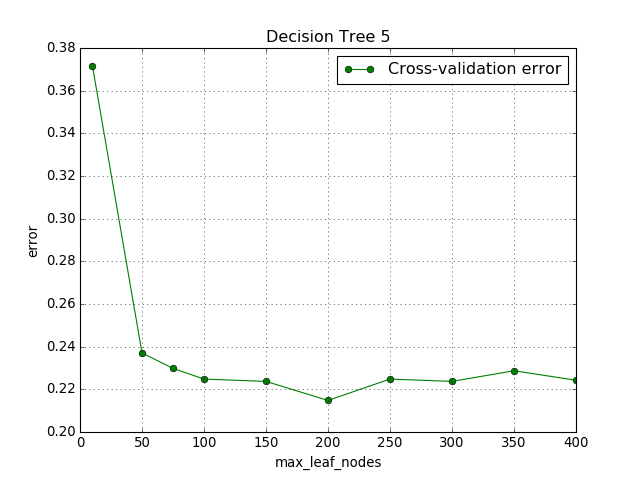

Decision Tree 4
regularization parameter list :  [0, 0.5]
errors :  [ 0.23094046  0.22314969]
best regularization parameter :  0.5


<IPython.core.display.Javascript object>


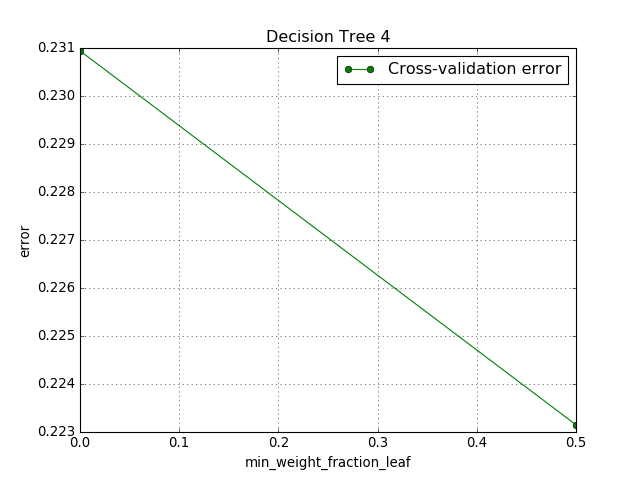

SVM
regularization parameter list :  [0.01, 0.1, 1, 10, 100, 150]
errors :  [ 0.8425153   0.45464663  0.08569839  0.05063996  0.04730106  0.04785754]
best regularization parameter :  100


<IPython.core.display.Javascript object>


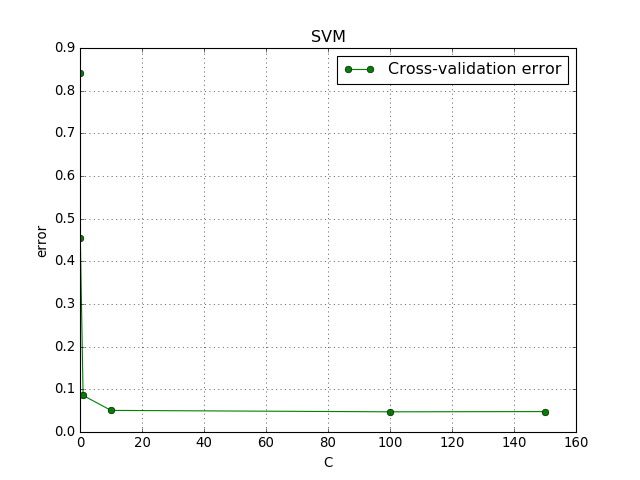

Decision Tree 1
regularization parameter list :  [10, 50, 100, 150, 200, 250, 300]
errors :  [ 0.23038397  0.23205342  0.22871452  0.22203673  0.22760156  0.22092376
  0.22815804]
best regularization parameter :  250


<IPython.core.display.Javascript object>


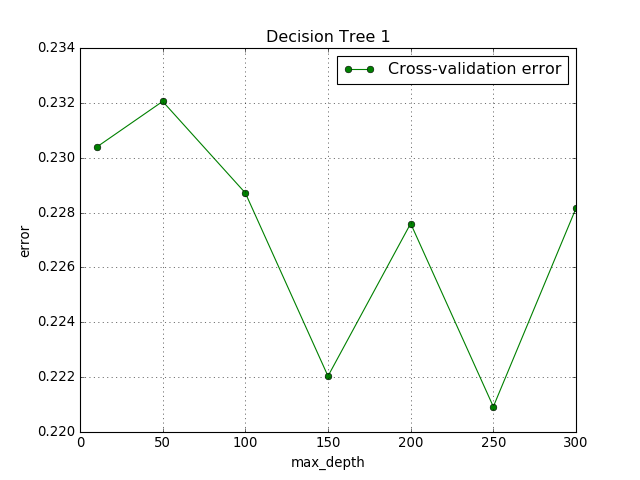

Decision Tree 3
regularization parameter list :  [1, 2, 3, 4, 5, 6]
errors :  [ 0.22537563  0.22704508  0.23483584  0.24095715  0.23483584  0.24095715]
best regularization parameter :  1


<IPython.core.display.Javascript object>


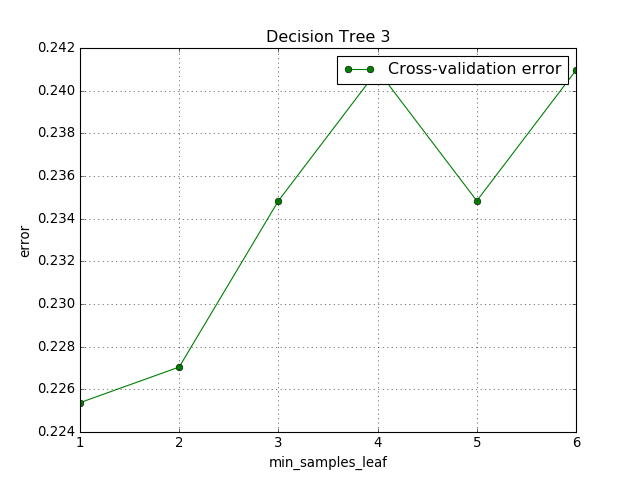

Decision Tree 2
regularization parameter list :  [2, 5, 8, 10, 15]
errors :  [ 0.22815804  0.22259321  0.22982749  0.23205342  0.24373957]
best regularization parameter :  5


<IPython.core.display.Javascript object>


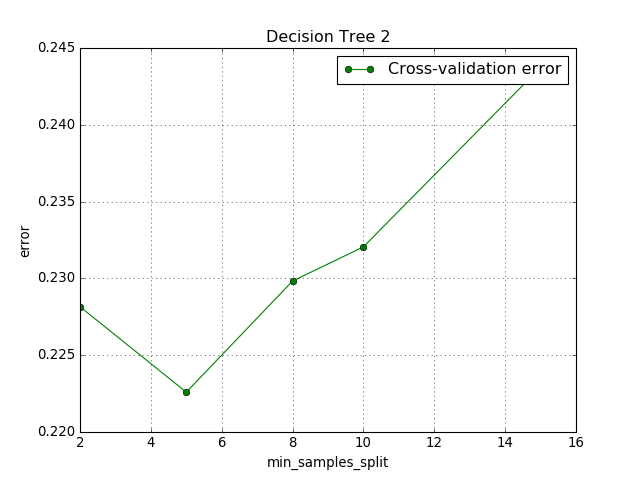

Logistique Regression
regularization parameter list :  [0.01, 0.1, 1, 10, 100, 150]
errors :  [ 0.0951586   0.07846411  0.07735114  0.08124652  0.08625487  0.08736784]
best regularization parameter :  1


<IPython.core.display.Javascript object>


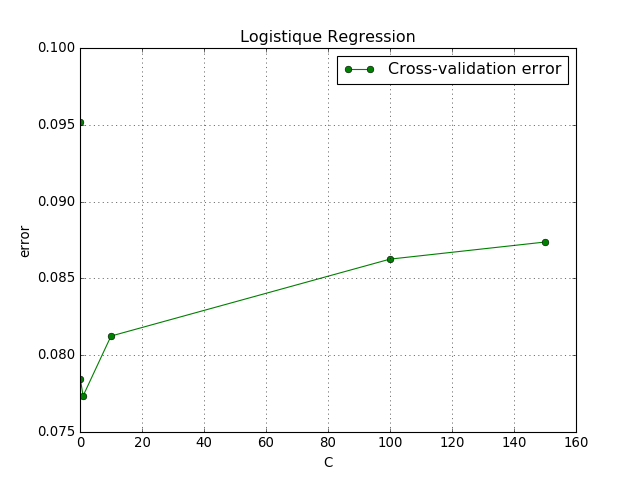

Random Forest
regularization parameter list :  [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100, 200, 250, 300, 350, 400]
errors :  [ 0.14579855  0.10239288  0.08402894  0.07456873  0.06677796  0.06288258
  0.0690039   0.06010017  0.06399555  0.06343907  0.06176962  0.06176962
  0.06010017  0.06121313  0.05731775  0.06010017]
best regularization parameter :  350


<IPython.core.display.Javascript object>


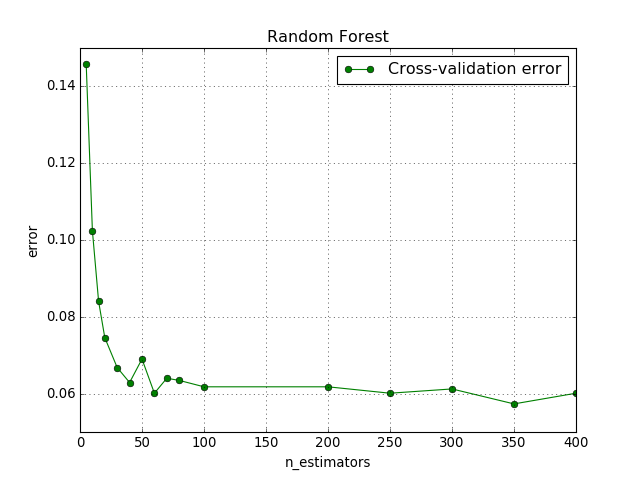

In [224]:
from sklearn.ensemble import RandomForestClassifier

param_grid_C = {'C': [0.01,0.1,1,10,100,150]}
param_grid_depth = {'max_depth': [10,50,100,150,200,250,300]}
param_grid_min_samples_split = {'min_samples_split': [2,5,8,10,15]} #The minimum number of samples required to split an internal node.
param_grid_min_samples_leaf = {'min_samples_leaf': [1,2,3,4,5,6]} # The minimum number of samples required to be at a leaf node.
param_grid_min_weight_fraction_leaf = {'min_weight_fraction_leaf': [0,0.5]} # The minimum weighted fraction of the input samples required to be at a leaf node.
param_grid_max_leaf_nodes = {'max_leaf_nodes': [10,50,75,100,150,200,250,300,350,400]} # Grow a tree with max_leaf_nodes in best-first fashion
param_grid_n_estimators = {'n_estimators' : [5,10,15,20,30,40,50,60,70,80,100,200,250,300,350,400]}

clf_logreg = grid_search.GridSearchCV(LogisticRegression(), param_grid_C)
clf_tree_1 = grid_search.GridSearchCV(DecisionTreeClassifier(), param_grid_depth)
clf_tree_2 = grid_search.GridSearchCV(DecisionTreeClassifier(), param_grid_min_samples_split)
clf_tree_3 = grid_search.GridSearchCV(DecisionTreeClassifier(), param_grid_min_samples_leaf)
clf_tree_4 = grid_search.GridSearchCV(DecisionTreeClassifier(), param_grid_min_weight_fraction_leaf)
clf_tree_5 = grid_search.GridSearchCV(DecisionTreeClassifier(), param_grid_max_leaf_nodes)
clf_svc = grid_search.GridSearchCV(SVC(gamma=0.001), param_grid_C)
clf_rd = grid_search.GridSearchCV(RandomForestClassifier(), param_grid_n_estimators)

clf_list = dict()
clf_list["Logistique Regression"] = clf_logreg
clf_list["Decision Tree 1"] = clf_tree_1
clf_list["Decision Tree 2"] = clf_tree_2
clf_list["Decision Tree 3"] = clf_tree_3
clf_list["Decision Tree 4"] = clf_tree_4
clf_list["Decision Tree 5"] = clf_tree_5
clf_list["SVM"] = clf_svc
clf_list["Random Forest"] = clf_rd

param_list = dict()
param_list["Logistique Regression"] = 'C'
param_list["Decision Tree 1"] = 'max_depth'
param_list["Decision Tree 2"] = 'min_samples_split'
param_list["Decision Tree 3"] = 'min_samples_leaf'
param_list["Decision Tree 4"] = 'min_weight_fraction_leaf'
param_list["Decision Tree 5"] = 'max_leaf_nodes'
param_list["SVM"] = 'C'
param_list["Random Forest"] = 'n_estimators'


for name_clf in clf_list:
    print name_clf
    clf = clf_list[name_clf]
    name_param = param_list[name_clf]
    clf.fit(Xscl,y)
    param_best = clf.best_params_[name_param]
    scores = [x[1] for x in clf.grid_scores_]
    errors = 1 - np.asarray(scores)
    print "regularization parameter list : ",clf.param_grid[name_param]
    print "errors : ",errors
    print "best regularization parameter : ",param_best
    fig4 = plt.figure()
    plt.grid()
    plt.plot(clf.param_grid[name_param], errors, 'o-', color="g",
                 label="Cross-validation error")
    plt.legend(loc="best")
    plt.xlabel(name_param)
    plt.ylabel('error')
    plt.legend()
    plt.title(name_clf)
    plt.show()
    